In [25]:
import torch.nn as nn


# (input_size + 2 * padding - kernel_size) / stride + 1
class Lenet5(nn.Module):
    def __init__(self):
        super(Lenet5, self).__init__()
        self.layers = nn.Sequential(
            # 第一层
            # 这里1是输入的通道数，6是输出的通道数（也可以理解成6个卷积核）
            nn.Conv2d(3, 6, kernel_size=(5, 5), padding=2),  # 卷积层
            nn.ReLU(True),  # 激活函数
            nn.MaxPool2d(kernel_size=2, stride=2),  # 最大池化层

            # 第二层
            nn.Conv2d(6, 16, kernel_size=(5, 5)),  # 卷积层
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        # 全连接层
        self.fc = nn.Sequential(
            nn.Linear(6 * 6 * 16, 120),
            nn.Linear(120, 84),
            nn.Linear(84, 10)
        )

    def forward(self, x):
        x = self.layers(x)
        x = x.view(x.size(0), -1)  # 展开为一维
        x = self.fc(x)
        return x


Files already downloaded and verified
Files already downloaded and verified


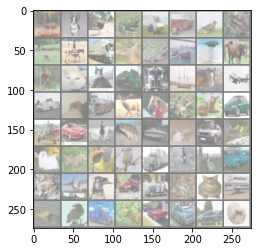

[Epoch:1, batch:100] train loss: 2.112
[Epoch:1, batch:200] train loss: 1.800
[Epoch:1, batch:300] train loss: 1.682
[Epoch:1, batch:400] train loss: 1.606
[Epoch:1, batch:500] train loss: 1.539
[Epoch:1, batch:600] train loss: 1.530
[Epoch:1, batch:700] train loss: 1.486
第1轮的准确率为:46.79%
[Epoch:2, batch:100] train loss: 1.446
[Epoch:2, batch:200] train loss: 1.412
[Epoch:2, batch:300] train loss: 1.410
[Epoch:2, batch:400] train loss: 1.370
[Epoch:2, batch:500] train loss: 1.375
[Epoch:2, batch:600] train loss: 1.340
[Epoch:2, batch:700] train loss: 1.332
第2轮的准确率为:53.56%
[Epoch:3, batch:100] train loss: 1.289
[Epoch:3, batch:200] train loss: 1.287
[Epoch:3, batch:300] train loss: 1.276
[Epoch:3, batch:400] train loss: 1.266
[Epoch:3, batch:500] train loss: 1.248
[Epoch:3, batch:600] train loss: 1.253
[Epoch:3, batch:700] train loss: 1.237
第3轮的准确率为:56.60%
[Epoch:4, batch:100] train loss: 1.195
[Epoch:4, batch:200] train loss: 1.194
[Epoch:4, batch:300] train loss: 1.221
[Epoch:4, batch:

In [26]:
from torchvision import datasets
import torch.utils.data
import torchvision
import torch.nn as nn
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
import os


def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


    
train_set = datasets.CIFAR10(root='./res/data', transform=transforms.ToTensor(), train=True, download=True)
test_set = datasets.CIFAR10(root='./res/data', transform=transforms.ToTensor(), train=False, download=True)
train_set = torch.utils.data.DataLoader(dataset=train_set, batch_size=64, shuffle=True)
test_set = torch.utils.data.DataLoader(dataset=test_set, batch_size=64, shuffle=True)
imshow(torchvision.utils.make_grid(next(iter(train_set))[0]))
device = torch.device("cuda") 
lenet5 = Lenet5().to(device)  # 定义模型
loss_function = nn.CrossEntropyLoss()  # 定义损失函数（交叉熵）
optimizer = torch.optim.Adam(lenet5.parameters(), lr=0.001)  # 使用adam进行反向传播 back propagation 或者 SGD 梯度下降
epochs = 30
for epoch in range(epochs):

    # 训练训练集
    loss = 0
    for i, data in enumerate(train_set):
        inputs, labels = data  # 获取参数和对应的标签
        inputs, labels = inputs.to(device), labels.to(device)  # gpu
        optimizer.zero_grad()  # 重置优化器为0

        output = lenet5(inputs)  # 计算预测值
        loss_per = loss_function(output, labels)  # 计算损失值
        loss_per.backward()  # 反向传播
        optimizer.step()

        loss += loss_per.item()  # 计算每次的损失和

        if i % 100 == 99:
            print('[Epoch:%d, batch:%d] train loss: %.03f' % (epoch + 1, i + 1, loss / 100))
            loss = 0.0

    # 对测试集进行测试
    total, right = 0, 0
    for data in test_set:
        test_inputs, test_labels = data
        test_inputs, test_labels = test_inputs.to(device), test_labels.to(device)
        output_test = lenet5(test_inputs)
        output_predict = torch.max(output_test.data, 1)[1]
        total += test_labels.size(0)
        temp = (output_predict == test_labels).sum()
        right += temp
    print("第{}轮的准确率为:{:.2f}%".format(epoch + 1, 100.0 * right.item() / total))


In [27]:
import torch.nn as nn


class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        # 卷积层
        self.layers = nn.Sequential(
            # 第一层
            # 5 * 5 * 3
            # 2 * 3 * 3 * 3
            # 3 * 3 * 2

            nn.Conv2d(3, 96, kernel_size=(3, 3)),  # input_channel, output_channel
            nn.BatchNorm2d(96),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=3, stride=2),

            # 第二层
            nn.Conv2d(96, 256, kernel_size=(3, 3)),
            nn.BatchNorm2d(256),
            nn.ReLU(True),
            nn.MaxPool2d(kernel_size=3, stride=2),

            # 第三层
            nn.Conv2d(256, 384, kernel_size=(3, 3), padding=1),
            nn.ReLU(True),

            # 第四层
            nn.Conv2d(384, 384, kernel_size=(3, 3), padding=1),
            nn.ReLU(True),

            # 第五层
            nn.Conv2d(384, 256, kernel_size=(3, 3), padding=1),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )

        # 全连接层
        self.fc = nn.Sequential(
            nn.Linear(1024, 2048),
            nn.Dropout(0.5),
            nn.Linear(2048, 2048),
            nn.Dropout(0.5),
            nn.Linear(2048, 10)
        )

    def forward(self, x):
        x = self.layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x


In [28]:
import os

import torch
import torch.nn as nn
from torchvision import transforms
from torchvision import datasets
import torch.utils.data
device = torch.device("cuda")


train_set = datasets.CIFAR10(root='./res/data', transform=transforms.ToTensor(), train=True, download=True)
test_set = datasets.CIFAR10(root='./res/data', transform=transforms.ToTensor(), train=False, download=True)
train_set = torch.utils.data.DataLoader(dataset=train_set, batch_size=64, shuffle=True, num_workers=4)

test_set = torch.utils.data.DataLoader(dataset=test_set, batch_size=64, shuffle=True, num_workers=4)
alexNet = AlexNet().to(device)

optimize = torch.optim.Adam(alexNet.parameters(), lr=0.001)
loss_function = nn.CrossEntropyLoss()
epochs = 30
for epoch in range(epochs):
    loss_sum = 0.0
    for i, data in enumerate(train_set):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimize.zero_grad()
        outputs = alexNet(inputs)
        loss_per = loss_function(outputs, labels)
        loss_per.backward()
        optimize.step()
        loss_sum += loss_per.item()

        if i % 100 == 99:
            print('[Epoch:%d, batch:%d] train loss: %.03f' % (epoch + 1, i + 1, loss_sum / 100))
            loss_sum = 0.0

    total, right = 0, 0
    for i, data in enumerate(test_set):
        test_inputs, test_labels = data
        test_inputs, test_labels = test_inputs.to(device), test_labels.to(device)
        test_outputs = alexNet(test_inputs)
        test_outputs = torch.max(test_outputs.data, 1)[1]
        total += test_outputs.size(0)
        right += (test_labels == test_outputs).sum()
    print("第{}轮的准确率为:{:.2f}%".format(epoch + 1, 100.0 * right.item() / total))



Files already downloaded and verified
Files already downloaded and verified
[Epoch:1, batch:100] train loss: 2.136
[Epoch:1, batch:200] train loss: 1.794
[Epoch:1, batch:300] train loss: 1.708
[Epoch:1, batch:400] train loss: 1.619
[Epoch:1, batch:500] train loss: 1.557
[Epoch:1, batch:600] train loss: 1.482
[Epoch:1, batch:700] train loss: 1.448
第1轮的准确率为:46.08%
[Epoch:2, batch:100] train loss: 1.403
[Epoch:2, batch:200] train loss: 1.337
[Epoch:2, batch:300] train loss: 1.299
[Epoch:2, batch:400] train loss: 1.340
[Epoch:2, batch:500] train loss: 1.314
[Epoch:2, batch:600] train loss: 1.334
[Epoch:2, batch:700] train loss: 1.298
第2轮的准确率为:55.11%
[Epoch:3, batch:100] train loss: 1.259
[Epoch:3, batch:200] train loss: 1.214
[Epoch:3, batch:300] train loss: 1.206
[Epoch:3, batch:400] train loss: 1.228
[Epoch:3, batch:500] train loss: 1.212
[Epoch:3, batch:600] train loss: 1.211
[Epoch:3, batch:700] train loss: 1.262
第3轮的准确率为:59.23%
[Epoch:4, batch:100] train loss: 1.159
[Epoch:4, batch:20